#### Chi Square $\chi^2$ (categorical ~ categorical)
Computes the chi-square, $\chi^2$ , statistic and p-value for the hypothesis test of independence of frequencies in the observed contingency table (cross-table). The observed frequencies are tested against an expected contingency table obtained by computing expected frequencies based on the marginal sums under the assumption of independence.<br>
Example: 20 participants: 10 exposed to some chemical product and 10 non exposed (exposed
= 1 or 0). Among the 20 participants 10 had cancer 10 not (cancer = 1 or 0). $\chi^2$ tests the
association between those two variables.

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
# Dataset:
# 15 samples:
# 10 first exposed
exposed = np.array([1] * 10 + [0] * 10)
# 8 first with cancer, 10 without, the last two with.
cancer = np.array([1] * 8 + [0] * 10 + [1] * 2)
crosstab = pd.crosstab(exposed, cancer, rownames=['exposed'],
colnames=['cancer'])
print("Observed table:")
print("---------------")
print(crosstab)
chi2, pval, dof, expected = stats.chi2_contingency(crosstab)
print("Statistics:")
print("-----------")
print("Chi2 = %f, pval = %f" % (chi2, pval))
print("Expected table:")
print("---------------")
print(expected)

Observed table:
---------------
cancer   0  1
exposed      
0        8  2
1        2  8
Statistics:
-----------
Chi2 = 5.000000, pval = 0.025347
Expected table:
---------------
[[5. 5.]
 [5. 5.]]


In [2]:
# Compute expected cross-table based on proportion
exposed_marg = crosstab.sum(axis=0)
exposed_freq = exposed_marg / exposed_marg.sum()
cancer_marg = crosstab.sum(axis=1)
cancer_freq = cancer_marg / cancer_marg.sum()
print('Exposed frequency? Yes: %.2f' % exposed_freq[0],'No: %.2f' % exposed_freq[1])
print('Cancer frequency? Yes: %.2f' % cancer_freq[0],'No: %.2f' % cancer_freq[1])
print('Expected frequencies:')
print(np.outer(exposed_freq, cancer_freq))
print('Expected cross-table (frequencies * N): ')
print(np.outer(exposed_freq, cancer_freq) * len(exposed))

Exposed frequency? Yes: 0.50 No: 0.50
Cancer frequency? Yes: 0.50 No: 0.50
Expected frequencies:
[[0.25 0.25]
 [0.25 0.25]]
Expected cross-table (frequencies * N): 
[[5. 5.]
 [5. 5.]]


### Non-parametric test of pairwise associations
#### Spearman rank-order correlation (quantitative ~ quantitative)
The Spearman correlation is a non-parametric measure of the monotonicity of the relationship between two datasets. When to use it? Observe the data distribution: - presence of outliers - the distribution of the residuals is not Gaussian. Like other correlation coefficients, this one varies between -1 and +1 with 0 implying no cor- relation. Correlations of -1 or +1 imply an exact monotonic relationship. Positive correlations imply that as x increases, so does y. Negative correlations imply that as x increases, y decreases.

Non-Parametric Spearman cor test, cor: 0.7110, pval: 0.0095
Parametric Pearson cor test: cor: 0.5263, pval: 0.0788


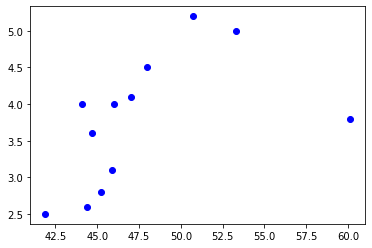

In [4]:
import matplotlib.pyplot as plt
x = np.array([44.4, 45.9, 41.9, 53.3, 44.7, 44.1, 50.7, 45.2, 46, 47, 48, 60.1])
y = np.array([2.6, 3.1, 2.5, 5.0, 3.6, 4.0, 5.2, 2.8, 4, 4.1, 4.5, 3.8])
plt.plot(x, y, "bo")
# Non-Parametric Spearman
cor, pval = stats.spearmanr(x, y)
print("Non-Parametric Spearman cor test, cor: %.4f, pval: %.4f" % (cor, pval))
# Parametric Pearson cor test
cor, pval = stats.pearsonr(x, y)
print("Parametric Pearson cor test: cor: %.4f, pval: %.4f" % (cor, pval))
plt.show()

#### Wilcoxon signed-rank test (quantitative ~ cte)
The Wilcoxon signed-rank test is a non-parametric statistical hypothesis test used when com- paring two related samples, matched samples, or repeated measurements on a single sample to assess whether their population mean ranks differ (i.e. it is a paired difference test). It is equivalent to one-sample test of the difference of paired samples.<br>
It can be used as an alternative to the paired Student’s t-test, t-test for matched pairs, or the t- test for dependent samples when the population cannot be assumed to be normally distributed. When to use it? Observe the data distribution: - presence of outliers - the distribution of the residuals is not Gaussian It has a lower sensitivity compared to t-test. May be problematic to use when the sample size is
small.<br>
Null hypothesis $H_0$ : difference between the pairs follows a symmetric distribution around zero.

In [5]:
import scipy.stats as stats
n = 20
# Buisness Volume time 0
bv0 = np.random.normal(loc=3, scale=.1, size=n)
# Buisness Volume time 1
bv1 = bv0 + 0.1 + np.random.normal(loc=0, scale=.1, size=n)
# create an outlier
bv1[0] -= 10
# Paired t-test
print(stats.ttest_rel(bv0, bv1))
# Wilcoxon
print(stats.wilcoxon(bv0, bv1))

Ttest_relResult(statistic=0.8697315842006617, pvalue=0.3953021486612337)
WilcoxonResult(statistic=49.0, pvalue=0.03656128916854718)


#### Mann–Whitney U test (quantitative ~ categorial (2 levels))
In statistics, the Mann–Whitney U test (also called the Mann–Whitney–Wilcoxon, Wilcoxon
rank-sum test or Wilcoxon–Mann–Whitney test) is a nonparametric test of the null hypothesis
that two samples come from the same population against an alternative hypothesis, especially
that a particular population tends to have larger values than the other.<br>
It can be applied on unknown distributions contrary to e.g. a t-test that has to be applied only
on normal distributions, and it is nearly as efficient as the t-test on normal distributions.

In [6]:
import scipy.stats as stats
n = 20
# Buismess Volume group 0
bv0 = np.random.normal(loc=1, scale=.1, size=n)
# Buismess Volume group 1
bv1 = np.random.normal(loc=1.2, scale=.1, size=n)
# create an outlier
bv1[0] -= 10
# Two-samples t-test
print(stats.ttest_ind(bv0, bv1))
# Wilcoxon
print(stats.mannwhitneyu(bv0, bv1))

Ttest_indResult(statistic=0.53372523028925, pvalue=0.5966401349598488)
MannwhitneyuResult(statistic=30.0, pvalue=2.2700398199689824e-06)
